#  Exploratory Data Analysis

Data Understanding

## Summary

In this notebook:

7. Converted numerical categorical variables to string labels for better interpretability.
8. Encoded the target variable into numerical values for correlation analysis.
9. Computed the correlation matrix, including the encoded target variable.
10. Visualized the correlation matrix using a heatmap to identify relationships between features and the target variable.

In [39]:
#Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [40]:
# Read the CSV back into a DataFrame
try:
    df_raw = pd.read_csv('data/row_data.csv')
    print("Data loaded successfully from CSV.")
except Exception as e:
    print(f"""Error reading CSV into DataFrame, 
          Check 01_Predict_Students_Dropout_Get_Raw_Data notebook: {e}""")
    raise

Data loaded successfully from CSV.


In [41]:
#print columns
df_raw.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [59]:
# Display the df_raw DataFrame
display(df_raw.head(5))  # Display the df_raw DataFrame in a Jupyter Notebook or interactive environment

# Check the shape of the df_raw DataFrame to see the number of rows and columns
df_raw.shape  # Returns a tuple representing the dimensionality of the DataFrame (number of rows, number of columns)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,17,5,171,1,Secondary education,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,15,1,9254,1,Secondary education,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,9070,1,Secondary education,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,17,2,9773,1,Secondary education,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,39,1,8014,0,Secondary education,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,married,39,1,9991,0,Basic education 3rd cycle (9th/10th/11th year)...,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,single,1,1,9500,1,Secondary education,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,single,18,4,9254,1,Secondary education,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,single,1,3,9238,1,Secondary education,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,single,1,1,9238,1,Secondary education,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


(4424, 37)

In [43]:
# Defining categorical and quantitative columns based on the above checks and metadata description
categorical_cols = ["Marital Status", "Application mode", "Application order", "Course", "Daytime/evening attendance",
                    "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation",
                    "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender",
                    "Scholarship holder", "International", "Target"]

quantitative_cols = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                  'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                  'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                  'Age at enrollment', 'Inflation rate', 'GDP', 'Unemployment rate']

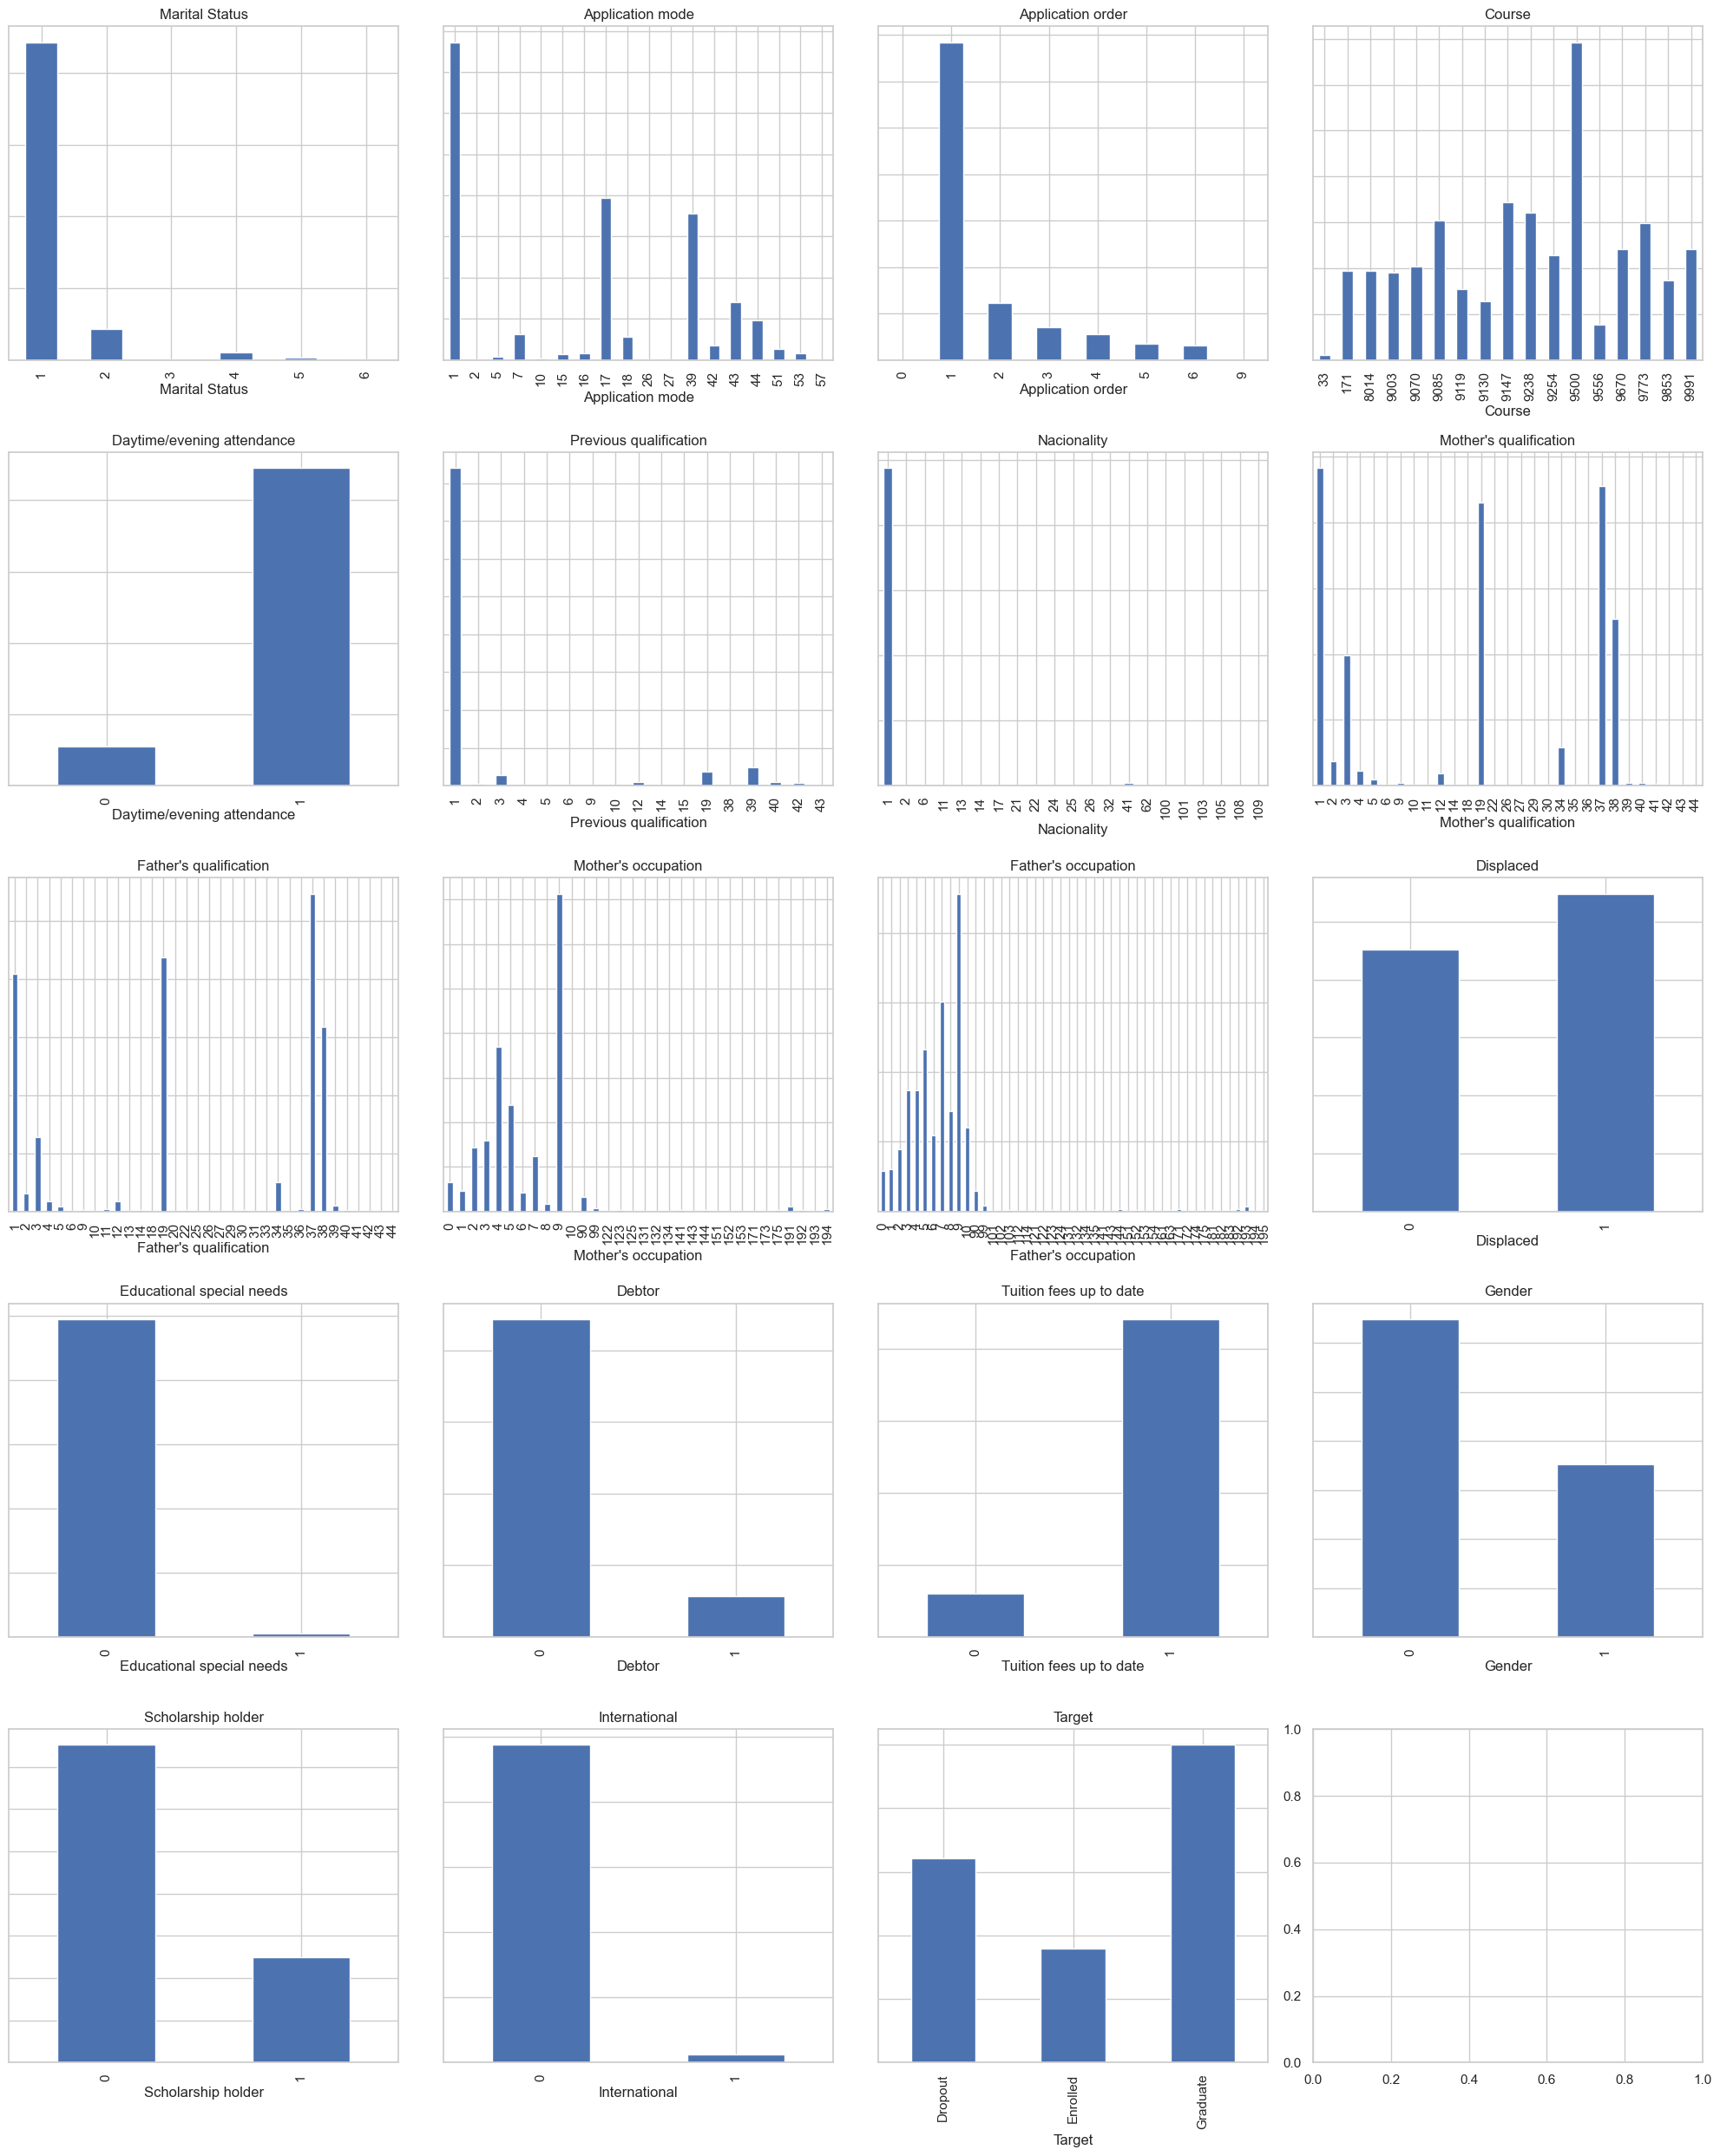

<Figure size 640x480 with 0 Axes>

In [44]:
# loop through categorical columns and create barplot for each
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    row_idx = i // 4
    col_idx = i % 4
    vc = df_raw[col].value_counts(normalize=True)
    vc = vc.sort_index() # sort by category name
    vc.plot(kind="bar", ax=axes[row_idx, col_idx], rot=0)
    axes[row_idx, col_idx].set_title(col)
    for tick in axes[row_idx, col_idx].get_xticklabels():
        tick.set_rotation(90)
    for tick in axes[row_idx, col_idx].get_yticklabels():
        tick.set_visible(False)
fig.tight_layout()
plt.savefig('images/boxplotCatergricalCols.jpg', dpi=300)
plt.show()
plt.clf()

In [45]:
import pandas as pd

# Define the mapping dictionaries for the specified columns
mapping_dict = {
    'Marital Status': {
        1: 'single', 2: 'married', 3: 'other', 4: 'divorced', 
        5: 'other', 6: 'other'
    },
    'Previous qualification': {
        1: 'Secondary education', 2: 'Higher education - bachelor\'s degree', 
        3: 'Higher education - degree', 4: 'Higher education - master\'s', 
        5: 'Higher education - doctorate', 6: 'Frequency of higher education', 
        9: '12th year of schooling - not completed', 10: '11th year of schooling - not completed', 
        12: 'Other - 11th year of schooling', 14: '10th year of schooling', 
        15: '10th year of schooling - not completed', 19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.', 
        38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.', 39: 'Technological specialization course', 
        40: 'Higher education - degree (1st cycle)', 42: 'Professional higher technical course', 
        43: 'Higher education - master (2nd cycle)'
    },
    'Gender': {
        1: 'male', 0: 'female'
    }
}


# Convert numerical categorical variables to strings
def convert_numerical_categorical_to_strings(df, columns_mapping):
    for col, mapping in columns_mapping.items():
        df[col] = df[col].map(mapping)
    return df

# Apply the conversion function to the DataFrame
df = convert_numerical_categorical_to_strings(df_raw, mapping_dict)

# # Save the cleaned data
# data_dir = 'data/'  # Directory to save the data
# df.to_csv(data_dir + 'cleaned_data.csv', index=False)

print(f"Cleaned data has been saved in {display(df.head(5))} as 'cleaned_data.csv'.")


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,17,5,171,1,Secondary education,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,15,1,9254,1,Secondary education,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,9070,1,Secondary education,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,17,2,9773,1,Secondary education,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,39,1,8014,0,Secondary education,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Cleaned data has been saved in None as 'cleaned_data.csv'.


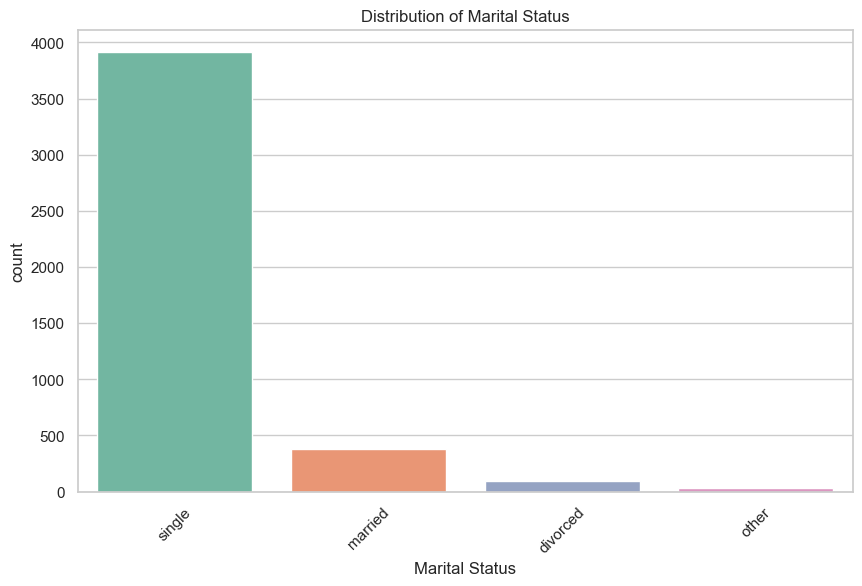

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your cleaned DataFrame

# Set the style of the visualization
sns.set(style="whitegrid")

# 1. Bar Plot - Distribution of Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital Status', order=df['Marital Status'].value_counts().index, palette="Set2")
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)
plt.show()


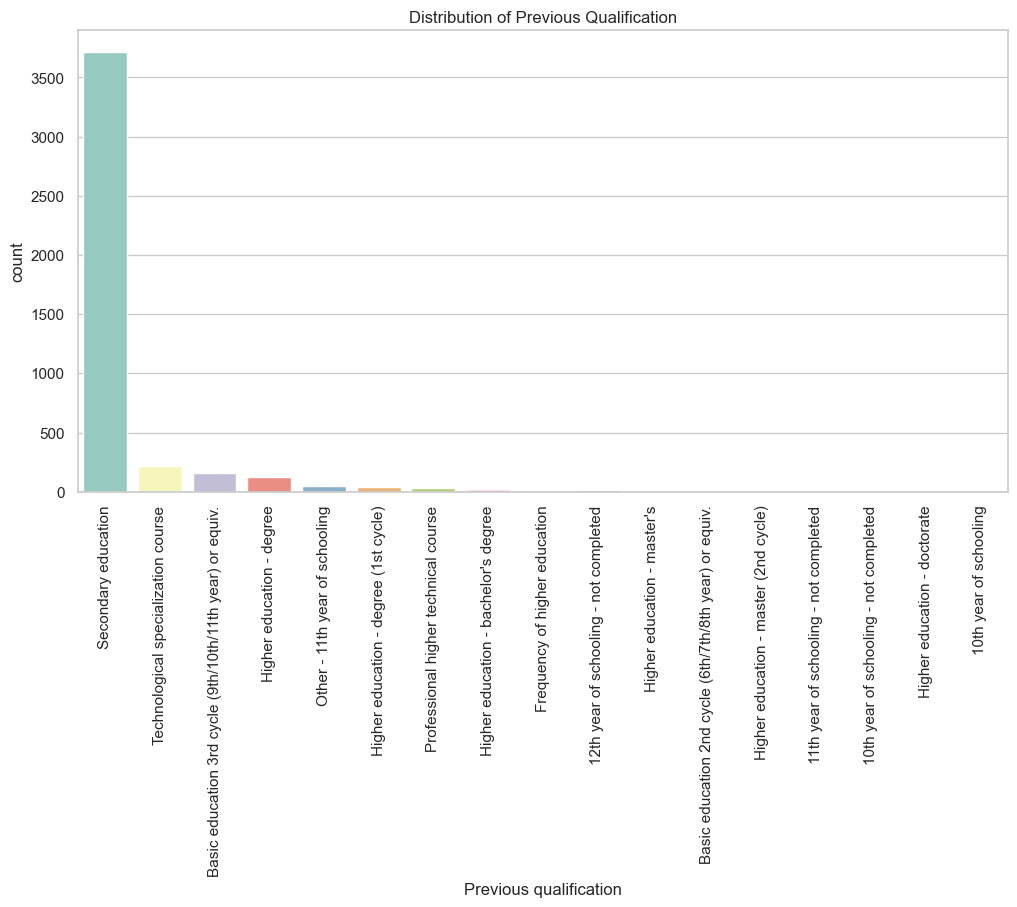

In [47]:
# 2. Bar Plot - Distribution of Previous Qualification
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Previous qualification', order=df['Previous qualification'].value_counts().index, palette="Set3")
plt.title('Distribution of Previous Qualification')
plt.xticks(rotation=90)
plt.show()

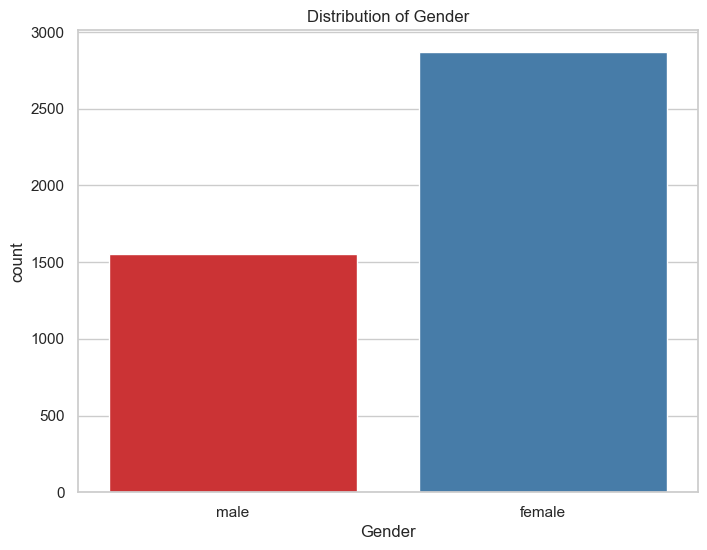

In [48]:
# 3. Bar Plot - Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette="Set1")
plt.title('Distribution of Gender')
plt.show()

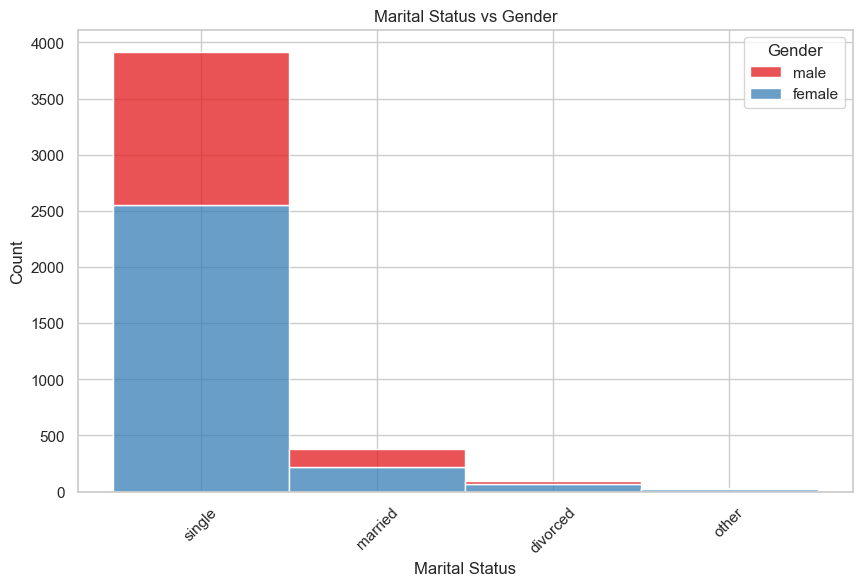

In [49]:
# 4. Stacked Bar Plot - Marital Status vs Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Marital Status', hue='Gender', multiple='stack', palette="Set1")
plt.title('Marital Status vs Gender')
plt.xticks(rotation=45)
plt.show()

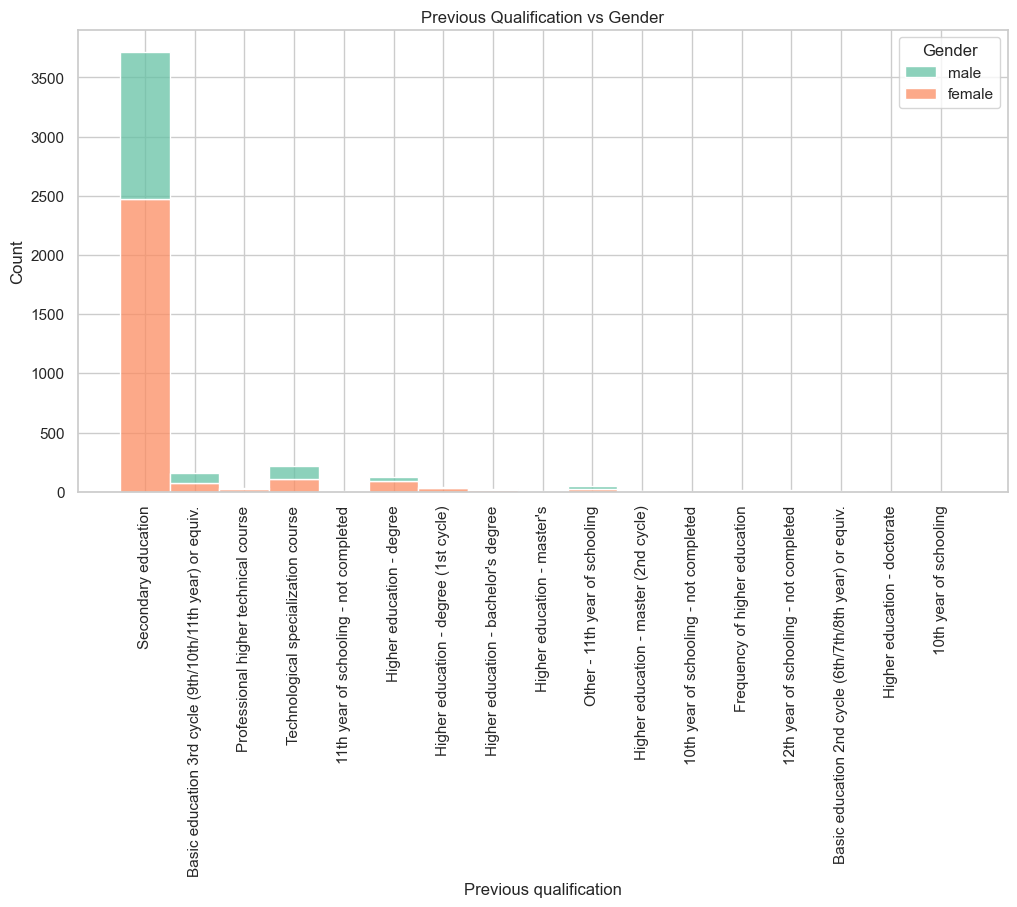

In [50]:
# 5. Stacked Bar Plot - Previous Qualification vs Gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Previous qualification', hue='Gender', multiple='stack', palette="Set2")
plt.title('Previous Qualification vs Gender')
plt.xticks(rotation=90)
plt.show()

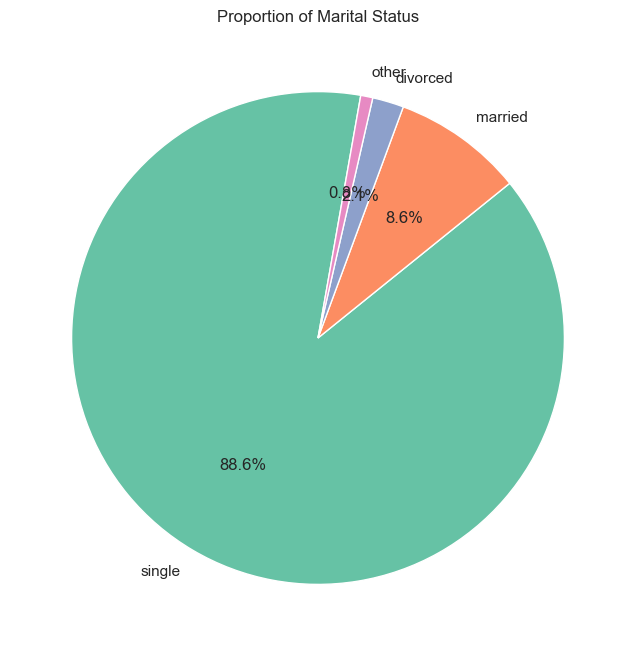

In [55]:
# 6. Pie Chart - Proportion of Marital Status
plt.figure(figsize=(8, 8))
df['Marital Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=80)
plt.title('Proportion of Marital Status')
plt.ylabel('')
plt.show()

In [ ]:
# 10. Box Plot - Age Distribution across Marital Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Marital Status', y='Age at enrollment', palette="Set2")
plt.title('Age Distribution across Marital Status')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 11. Box Plot - Age Distribution across Previous Qualification
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Previous qualification', y='Age at enrollment', palette="Set3")
plt.title('Age Distribution across Previous Qualification')
plt.xticks(rotation=90)
plt.show()